In [4]:
import os
import pandas as pd

data_path = r'digit-recognizer'
data_train = pd.read_csv(os.path.join(data_path, 'train.csv'))
data_test = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [2]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
print('training set size:', data_train.shape)
print('test set size:', data_test.shape)

training set size: (42000, 785)
test set size: (28000, 784)


[19537, 25706, 11935, 36532, 35260, 1516, 9148, 22224, 33121, 30269, 41856, 38997, 31408, 32305, 36726]


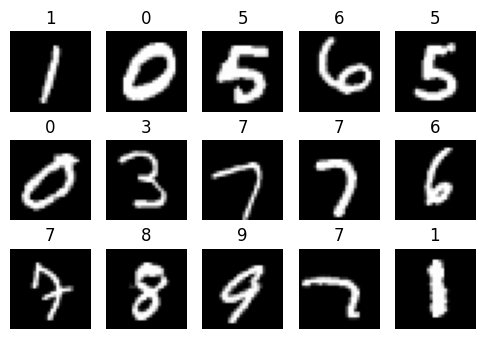

In [5]:
import matplotlib.pyplot as plt
import random

rand_list = [random.randint(0, len(data_train.index)) for _ in range(15)]
print(rand_list)

fig = plt.figure(figsize=(6, 4))
for i, rl in enumerate(rand_list):
    fig.add_subplot(3, 5, i+1)
    plt.imshow(data_train.iloc[rl, 1:].to_numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(data_train['label'][rl])

### Train/val/test data preparation

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [5]:
X_train = data_train.iloc[:, 1:].to_numpy(dtype=np.float32)
y_train = data_train.iloc[:, 0].to_numpy(dtype=np.int32)
X_test = data_test.to_numpy(dtype=np.float32)

In [6]:
X_train = X_train.reshape(data_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(data_test.shape[0], 1, 28, 28)

# Normalize
X_train /= 255
X_test /= 255

# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=21)
print('Training set size:', X_train.shape)
print('Validation set size:', X_val.shape)
print('Test set size:', X_test.shape)

Training set size: (37800, 1, 28, 28)
Validation set size: (4200, 1, 28, 28)
Test set size: (28000, 1, 28, 28)


In [7]:
class Data(Dataset):
    """
    Data set preparation for training.
    """
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

In [10]:
data = {'train': {'X': X_train, 'y': y_train}, 
        'val': {'X': X_val, 'y': y_val}}

datasets = {i: Data(data[i]['X'], data[i]['y']) 
            for i in ['train', 'val']}

dataset_sizes = {i: len(datasets[i])
                 for i in ['train', 'val']}

dataLoaders = {i: DataLoader(datasets[i], batch_size=64, shuffle=True) 
               for i in ['train', 'val']}

### Define CNN Model

In [1]:
import torch.nn as nn
import torch.nn.functional as F


def conv_block(in_feature, out_feature, *args, **kwargs):
    return nn.Sequential(
        nn.Conv2d(in_feature, out_feature, *args, **kwargs),
        nn.BatchNorm2d(out_feature),
        nn.ReLU()
    )


class main_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = conv_block(1, 16, 3, padding='same')
        self.conv_block2 = conv_block(16, 32, 3, padding='same')
        self.conv_block3 = conv_block(32, 64, 3, padding='same')
        self.conv_block4 = conv_block(64, 64, 3, padding='same')
        
        self.fc1 = nn.Linear(7*7*64, 512)
        self.fc2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = F.max_pool2d(x, 2)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = F.max_pool2d(x, 2)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.softmax(x)
        return x

c:\Users\Eric JIA\OneDrive - Nanyang Technological University\Eric\Projects\Kaggle\Digit Recognizer\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Training

In [12]:
from tqdm.auto import tqdm
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
model = main_model().to(device)

epochs = 20
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epoch_loss = {'train': [], 'val': []}
epoch_accuracy = {'train': [], 'val': []}

# Start Training.
for epoch in range(epochs):
    print(f'-> Epoch {epoch+1}/{epochs}')
    since = time.time()
    
    # Each epoch has a training and validation phase.
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()
            
        running_loss = 0.0
        running_corrects = 0
        
        # Iterate over data.
        # pbar_data = tqdm(range(len(dataLoaders[phase])), desc=f'epoch {epoch+1}/{epochs} - {phase}')
        for i, (inputs, labels) in enumerate(dataLoaders[phase]):
        # for i, (inputs, labels) in enumerate(tqdm(dataLoaders[phase], desc=f'epoch {epoch+1}/{epochs} - {phase}')):
            # pbar_data.update()
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward (Track history only if phase==train)
            with torch.set_grad_enabled(phase=='train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels.long())
                
                # backward + optimize only if in training phase
                if phase=='train':
                    loss.backward()
                    optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds==labels.data)
        
        epoch_loss[phase].append(running_loss / dataset_sizes[phase])
        epoch_accuracy[phase].append(running_corrects.double().item() / dataset_sizes[phase])

    print('--> Time: {:.2f} ||| train loss: {:.6f} -- train accuracy: {:.6f} ||| val loss: {:.6f} -- val accuracy: {:.6f}'
          .format(time.time()-since, 
          epoch_loss['train'][epoch], 
          epoch_accuracy['train'][epoch], 
          epoch_loss['val'][epoch], 
          epoch_accuracy['val'][epoch]))

Device: cpu
-> Epoch 1/20
--> Time: 107.98 ||| train loss: 2.179679 -- train accuracy: 0.950608 ||| val loss: 2.174233 -- val accuracy: 0.984048
-> Epoch 2/20
--> Time: 110.65 ||| train loss: 2.174296 -- train accuracy: 0.984021 ||| val loss: 2.175907 -- val accuracy: 0.971667
-> Epoch 3/20
--> Time: 113.71 ||| train loss: 2.173691 -- train accuracy: 0.986640 ||| val loss: 2.173879 -- val accuracy: 0.985714
-> Epoch 4/20
--> Time: 123.57 ||| train loss: 2.173511 -- train accuracy: 0.987593 ||| val loss: 2.173051 -- val accuracy: 0.990238
-> Epoch 5/20
--> Time: 126.15 ||| train loss: 2.173327 -- train accuracy: 0.988915 ||| val loss: 2.173274 -- val accuracy: 0.987143
-> Epoch 6/20
--> Time: 128.06 ||| train loss: 2.173123 -- train accuracy: 0.989418 ||| val loss: 2.173391 -- val accuracy: 0.988095
-> Epoch 7/20
--> Time: 225.04 ||| train loss: 2.172955 -- train accuracy: 0.990767 ||| val loss: 2.172703 -- val accuracy: 0.992619
-> Epoch 8/20
--> Time: 112.59 ||| train loss: 2.172946 -

### Save model and results

In [13]:
import json

with open('results_train_val_loss.json', 'w') as fs:
    json.dump(epoch_loss, fs)

# epoch_accuracy = {k: v.item() for k, v in epoch_accuracy.items()}
with open('results_train_val_accuracy.json', 'w') as fs:
    json.dump(epoch_accuracy, fs)

# Save Model.
PATH = 'model.pt'
torch.save(model.state_dict(), PATH)

### Load the saved model

In [3]:
model = main_model()
PATH = 'model.pt'
model.load_state_dict(torch.load(PATH))
model.eval()

main_model(
  (conv_block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(

### Submission

In [8]:
model.eval()

with torch.no_grad():
    outputs = model(torch.FloatTensor(X_test))
    _, preds = torch.max(outputs, 1)
submission = pd.DataFrame({'ImageId': list(range(1, len(preds)+1)),
                           'Label': preds})
submission.to_csv('submission.csv', index=False, header=True)